In [1]:
# if this line is not separated from the line below this cell has to be executed twice
# Jupyter Notebook with widget matplotlib plots
%matplotlib notebook
# Jupyter Lab with widget matplotlib plots
#%matplotlib widget 
# with Jupyter and Jupyter Lab but without widget matplotlib plots
#%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pyicon as pyic  
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import numpy as np
from netCDF4 import Dataset
import cartopy.crs as ccrs
import seawater as sw
import xarray as xr
import matplotlib.pyplot as plt
import glob
from matplotlib.collections import PatchCollection
from matplotlib.collections import PolyCollection

-----calc
sys glob os
numpy
netcdf
Done modules calc.
-----calc_xr
sys glob os
numpy
netcdf
xarray
Done modules calc.
-----tb
sys
json
numpy
scipy
netcdf datetime
matplotlib
mybreak
pnadas
xarray
done xarray
-----IconData
-----plotting
-----view
-----calc
-----calc_xr
-----tb
-----IconData
-----plotting
-----view
-----quickplots
-----quickplots


In [4]:
%%time
# run = 'exp.test_ocean_omip_10days_21320-NDY'
# prfx = '_z_stress_xy0'
# # prfx = '_coriolis0'
# # prfx = '_z_GMRES_legacy'
# # prfx = '_z_CG'
# # prfx = '_z_thin_solver_1e-30_full_forcing'
# path_data = f'/work/mh0033/m211054/projects/icon/torus/zstar2_surface/experiments/{run}{prfx}/'
# run = 'nib1907_zlev_sft15'
run = 'nib1915_zlev_sft1'
run = 'nib1916_zstar_sft12'
run = 'nib1922_zstar_sft15_precip'
path_data = f'/home/mpim/m300602/work/proj_vmix/icon/icon_19/icon-oes_zstar3_torus/experiments/{run}/'
fpath_tgrid = f'{path_data}/Ocean_Torus_Triangles_10x10_100000m.nc'
fpath_fx = f'{path_data}/{run}_fx.nc'

ds_tg = xr.open_dataset(fpath_tgrid)
ds_fx = xr.open_dataset(fpath_fx)

ds = xr.open_mfdataset(f'{path_data}/{run}_inst_*.nc')
# ds = xr.open_dataset(f'{path_data}/nib1903_inst_20200120T000000Z.nc')
ds = ds.compute()
ds['clon'] *= 180./np.pi
ds['clat'] *= 180./np.pi

# ds = ds.where(ds!=0.)

CPU times: user 8.84 s, sys: 4.84 s, total: 13.7 s
Wall time: 13.8 s


In [90]:
ds = ds.where(ds!=0.)

In [91]:
ds

<xarray.Dataset>
Dimensions:                    (depth: 129, depth_2: 128, ncells: 200, ncells_2: 300, time: 481, vertices: 3, vertices_2: 4)
Coordinates:
    clon                       (ncells) float32 -180.0 -162.0 ... 126.0 144.0
    clat                       (ncells) float32 -78.0 -84.0 -60.0 ... 84.0 78.0
    elon                       (ncells_2) float32 -3.299 -2.985 ... 2.356 2.513
    elat                       (ncells_2) float32 -1.414 -1.414 ... 1.414 1.257
  * depth                      (depth) float64 0.0 2.0 ... 5.806e+03 6.003e+03
  * depth_2                    (depth_2) float64 1.0 3.05 ... 5.71e+03 5.904e+03
  * time                       (time) datetime64[ns] 2020-01-20 ... 2020-01-25
Dimensions without coordinates: ncells, ncells_2, vertices, vertices_2
Data variables: (12/43)
    clon_bnds                  (ncells, vertices) float32 -3.142 ... -3.456
    clat_bnds                  (ncells, vertices) float32 -1.571 ... 1.257
    elon_bnds                  (ncells_2, vertices_2) float32 nan -3.299 ... nan
    elat_bnds                  (ncells_2, vertices_2) float32 -1.466 ... 1.152
    tke                        (time, depth, ncells) float32 nan nan ... nan nan
    to                         (time, depth_2, ncells) float64 nan nan ... nan
    ...                         ...
    FrshFlux_TotalOcean        (time, ncells) float32 nan nan nan ... nan nan
    FrshFlux_VolumeIce         (time, ncells) float32 nan nan nan ... nan nan
    totalsnowfall              (time, ncells) float32 nan nan nan ... nan nan
    FrshFlux_VolumeTotal       (time, ncells) float32 nan nan nan ... nan nan
    swsum                      (time, ncells) float32 nan nan nan ... nan nan
    heatabs                    (time, ncells) float32 nan nan nan ... nan nan
Attributes:
    CDI:                  Climate Data Interface version 1.8.3rc (http://mpim...
    Conventions:          CF-1.6
    number_of_grid_used:  42
    uuidOfHGrid:          3f5b650c-4881-11ec-a644-85816eae5612
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               git@gitlab.dkrz.de:icon/icon-oes.git@0cc09d3a2ec8f3...
    history:              /home/m/m300602/work/proj_vmix/icon/icon_19/icon-oe...
    references:           see MPIM/DWD publications
    comment:              Nils Brüggemann (m300602) on m10304 (Linux 2.6.32-7...

In [92]:
ds.time.data

array(['2020-01-20T00:00:00.000000000', '2020-01-20T00:15:00.000000000',
       '2020-01-20T00:30:00.000000000', '2020-01-20T00:45:00.000000000',
       '2020-01-20T01:00:00.000000000', '2020-01-20T01:15:00.000000000',
       '2020-01-20T01:30:00.000000000', '2020-01-20T01:45:00.000000000',
       '2020-01-20T02:00:00.000000000', '2020-01-20T02:15:00.000000000',
       '2020-01-20T02:30:00.000000000', '2020-01-20T02:45:00.000000000',
       '2020-01-20T03:00:00.000000000', '2020-01-20T03:15:00.000000000',
       '2020-01-20T03:30:00.000000000', '2020-01-20T03:45:00.000000000',
       '2020-01-20T04:00:00.000000000', '2020-01-20T04:15:00.000000000',
       '2020-01-20T04:30:00.000000000', '2020-01-20T04:45:00.000000000',
       '2020-01-20T05:00:00.000000000', '2020-01-20T05:15:00.000000000',
       '2020-01-20T05:30:00.000000000', '2020-01-20T05:45:00.000000000',
       '2020-01-20T06:00:00.000000000', '2020-01-20T06:15:00.000000000',
       '2020-01-20T06:30:00.000000000', '2020-01-20

<IPython.core.display.Javascript object>


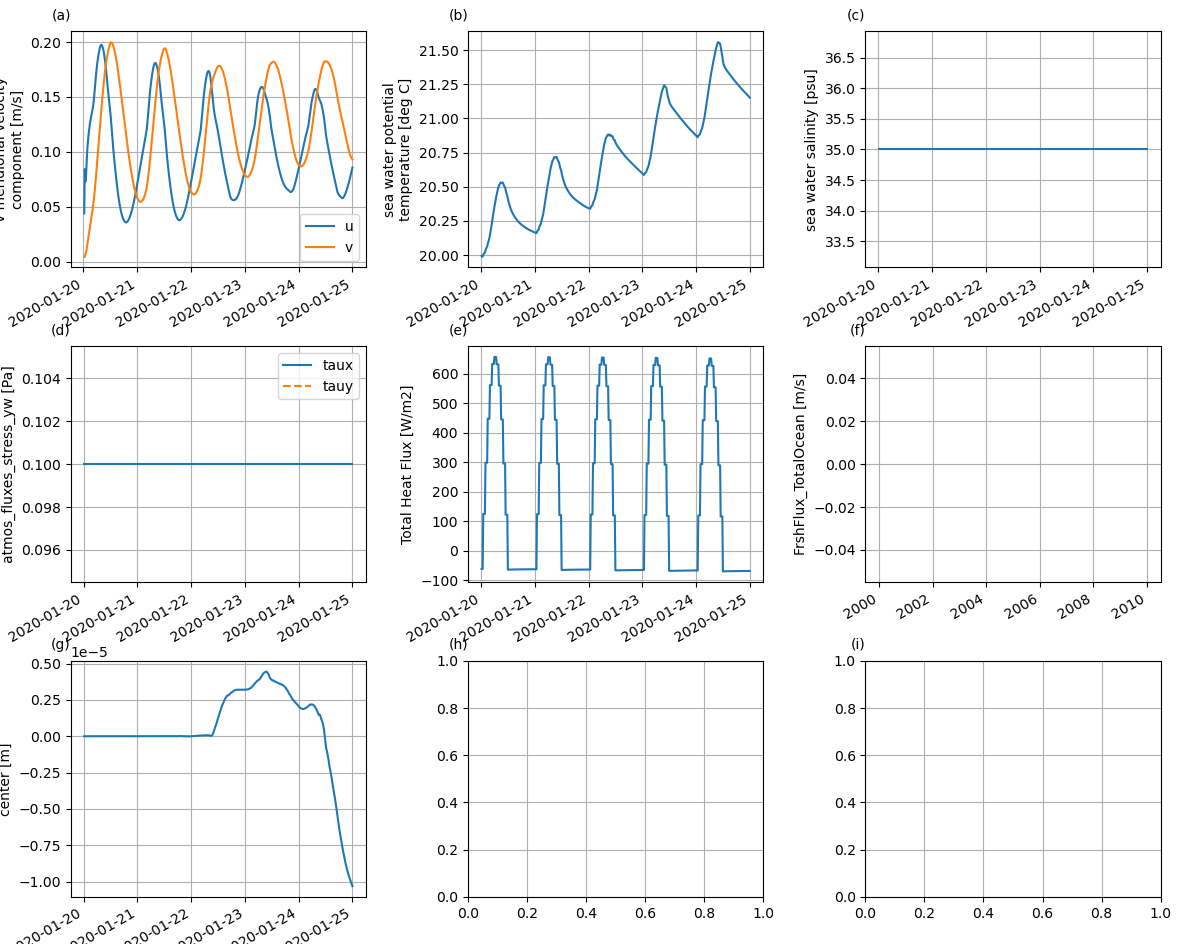

In [93]:
# fig = plt.figure()
# ax = plt.axes()
hca, hcb = pyic.arrange_axes(3,3, plot_cb=False, asp=0.8, fig_size_fac=1.5, sharex=False, sharey=False)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
ds.u.isel(depth_2=0, ncells=10).plot(ax=ax, label='u')
ds.v.isel(depth_2=0, ncells=10).plot(ax=ax, label='v')
ax.legend()

ii+=1; ax=hca[ii]; cax=hcb[ii]
ds.to.isel(depth_2=0, ncells=10).plot(ax=ax, label='u')

ii+=1; ax=hca[ii]; cax=hcb[ii]
ds.so.isel(depth_2=0, ncells=10).plot(ax=ax, label='u')

ii+=1; ax=hca[ii]; cax=hcb[ii]
ds.atmos_fluxes_stress_xw.isel(ncells=10).plot(ax=ax, label='taux')
ds.atmos_fluxes_stress_yw.isel(ncells=10).plot(ax=ax, label='tauy', linestyle='--')
# ds.atmos_fluxes_stress_xw.isel(ncells=11).plot(ax=ax, label='taux2')
# ds.atmos_fluxes_stress_yw.isel(ncells=11).plot(ax=ax, label='tauy2')
ax.legend()

ii+=1; ax=hca[ii]; cax=hcb[ii]
ds.HeatFlux_Total.isel(ncells=10).plot(ax=ax)

ii+=1; ax=hca[ii]; cax=hcb[ii]
ds.FrshFlux_TotalOcean.isel(ncells=10).plot(ax=ax)

ii+=1; ax=hca[ii]; cax=hcb[ii]
ds.zos.isel(ncells=10).plot(ax=ax)

for ax in hca:
    ax.grid(True)
    ax.set_title('')
    ax.set_xlabel('')

In [94]:
dt = (ds.time-ds.time[0]).astype(float)/86400/1e9

In [95]:
dz = ds.depth.diff(dim='depth').rename(depth='depth_2')#.data[np.newaxis,:,np.newaxis]
dz['depth_2'] = ds.depth_2
area = ds_tg.cell_area.rename(cell='ncells')

vol = area*dz
vol = vol.transpose()

In [96]:
cp = 4192.6641119999995
rho0 = 1025.022

In [97]:
# W = J/s = kg m^2/s^3 
# [T * cp * rho0] = K J / kg / K * kg / m^3 = J/m^3

<IPython.core.display.Javascript object>


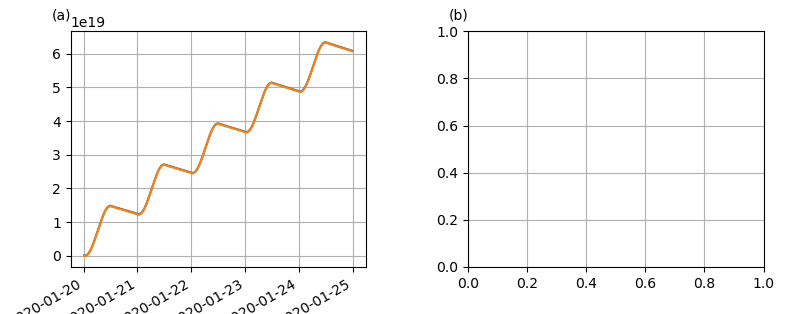

In [98]:
# fig = plt.figure()
hca, hcb = pyic.arrange_axes(2,1, plot_cb=False, asp=0.8, fig_size_fac=1.5, sharex=False, sharey=False)
ii=-1

tvol = vol.sum()

ii+=1; ax=hca[ii]; cax=hcb[ii]
# a = (ds.so*dz).isel(ncells=nc).sum(dim='depth_2')
# to = ds.to.where(ds.to!=0)
to = ds.to
a = (cp*rho0*to*vol).sum(dim=['ncells', 'depth_2'])#/vol.sum()
# a = (ds.so*vol).isel(depth_2=2).sum(dim=['ncells'])
a = a.where(a!=0)
a += -a.min()
a.plot(ax=ax)

# ii+=1; ax=hca[ii]; cax=hcb[ii]
# hf = ds.HeatFlux_Total.where(ds.HeatFlux_Total!=0.)
hf = ds.HeatFlux_Total
b = (hf*area*15.*60.).sum(dim=['ncells']).cumsum(dim='time')
b = b.where(b!=0)
b.plot(ax=ax)

# for k in [10,20,30,50]:
#     ii+=1; ax=hca[ii]; cax=hcb[ii]
#     b = (ds.so*area).isel(depth_2=k).sum(dim=['ncells'])/area.sum()
#     b = b.where(b!=0)
#     b.plot(ax=ax, label=k)
#     ax.legend()

for ax in hca:
    ax.grid(True)

In [99]:
# ds.to.isel(ncells=nc, time=1)

<IPython.core.display.Javascript object>


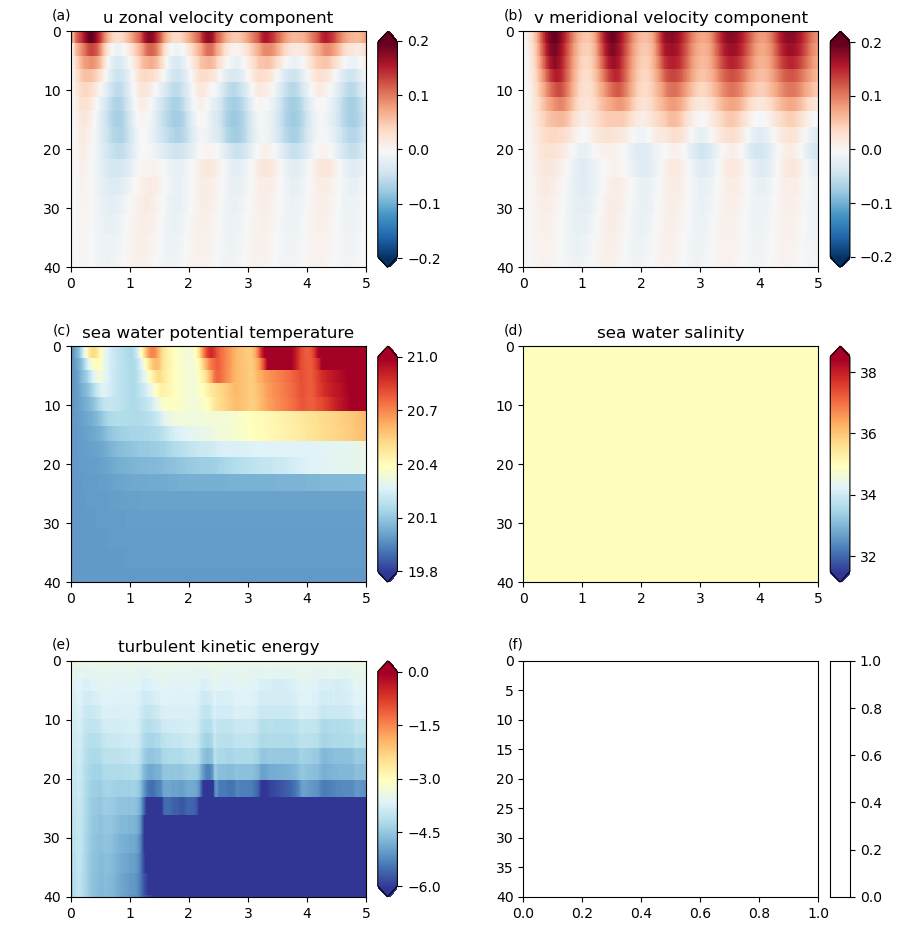

In [100]:
hca, hcb = pyic.arrange_axes(2,3, plot_cb=True, asp=0.8, fig_size_fac=1.5, sharex=False, sharey=False)
ii=-1

nc = 199

Dclim = dict(
u='sym',
v='sym',
to=[19.8, 21],
so='auto',
tke=[-6,0],
)

for var in ['u', 'v', 'to', 'so']:
    ii+=1; ax=hca[ii]; cax=hcb[ii]
    pyic.shade(dt, ds.depth_2, ds[var].isel(ncells=nc).transpose(), ax=ax, cax=cax, clim=Dclim[var])
    ax.set_title(ds[var].long_name)
    
for var in ['tke']:
    ii+=1; ax=hca[ii]; cax=hcb[ii]
    pyic.shade(dt, ds.depth, ds[var].isel(ncells=nc).data.transpose(), ax=ax, cax=cax, clim=Dclim[var], logplot=True)
    ax.set_title(ds[var].long_name)

for ax in hca:
    ax.set_ylim(40,0)

In [37]:
ind_reg, Tri = pyic.triangulation(ds_tg, do_mask_big_triangles=False, only_lon=False)

In [38]:
def my_scatter(data, ax, cax, clim=[None, None], cmap='auto'):
    
    # --- clim
    if isinstance(clim, str) and clim=='auto':
      clim = [None, None]
    elif isinstance(clim, str) and clim=='sym':
      clim = xr.ufuncs.fabs(data).max()
    clim=np.array(clim)
    if clim.size==1:
      clim = np.array([-1, 1])*clim
    if clim[0] is None:
      clim[0] = data.min()
    if clim[1] is None:
      clim[1] = data.max()

    # --- cmap
    if (clim[0]==-clim[1]) and cmap=='auto':
      cmap = 'RdBu_r'
    elif cmap=='auto':
      #cmap = 'viridis'
      cmap = 'RdYlBu_r'
    if isinstance(cmap, str):
      cmap = getattr(plt.cm, cmap)
    
    hm = ax.scatter(data.clon, data.clat, c=data, s=100, vmin=clim[0], vmax=clim[1], cmap=cmap)
    plt.colorbar(mappable=hm, cax=cax)
    return hm

In [39]:
# clon_bnds, clat_bnds, vlon_bnds, vlat_bnds, cells_of_vertex = pyic.patch_plot_derive_bnds(ds_tg) 
# vlon_bnds_reg = vlon_bnds#[ireg_v]
# vlat_bnds_reg = vlat_bnds#[ireg_v]
# cells_of_vertex_reg = cells_of_vertex#[ireg_v]
# clon_bnds_reg = clon_bnds#[ireg_c]
# clat_bnds_reg = clat_bnds#[ireg_c]
# patches_c, patches_v = pyic.patch_plot_patches_from_bnds(clon_bnds_reg, clat_bnds_reg, vlon_bnds_reg, vlat_bnds_reg, cells_of_vertex_reg) 

In [40]:
ds.time.size

481

In [59]:
it = 10
iz = 0
ds.to[it,iz,:].max().data, ds.to[it,iz,:].min().data

(array(20.0551548), array(20.0551548))

<IPython.core.display.Javascript object>


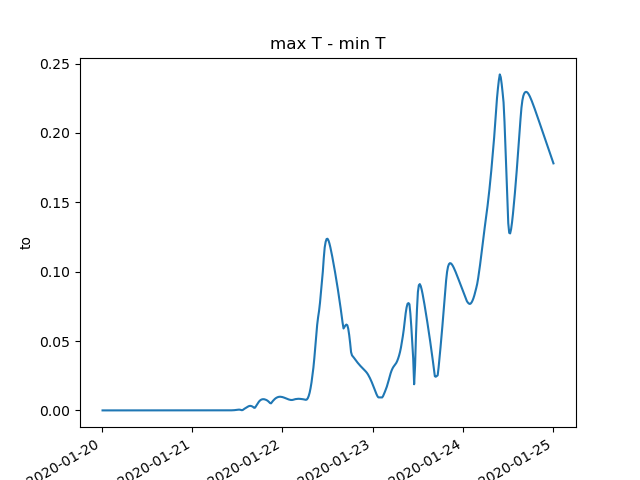

Text(0.5, 1.0, 'max T - min T')

In [76]:
a = (ds.to.max(dim='ncells')-ds.to.min(dim='ncells'))
# a[400,2].data
fig = plt.figure()
ax = plt.axes()
a[:,0].plot()
ax.set_title('max T - min T')

<IPython.core.display.Javascript object>


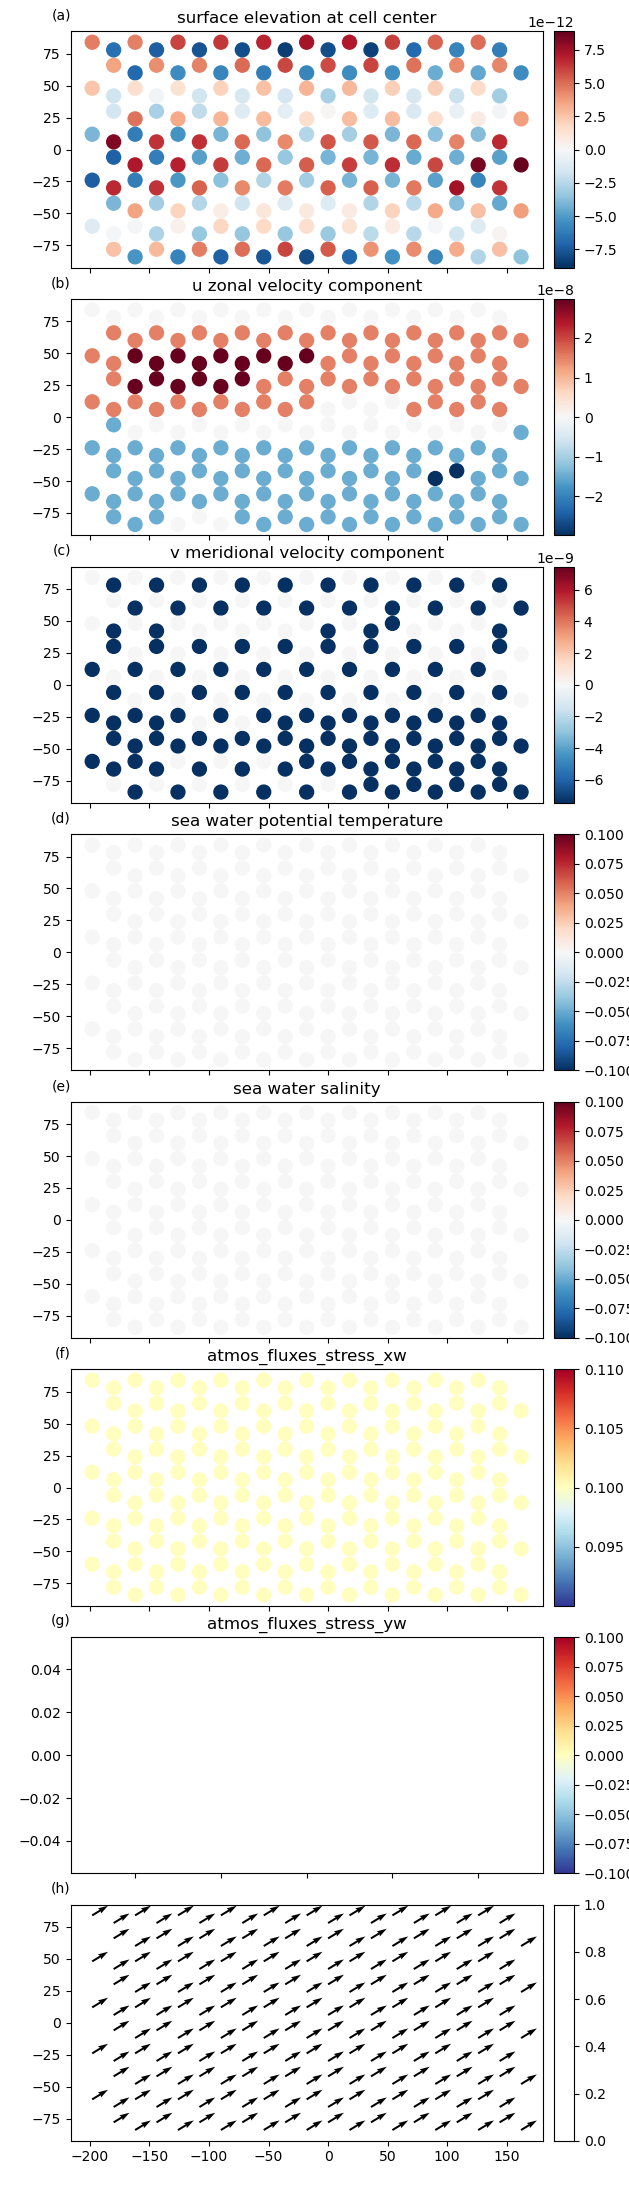

In [43]:
hca, hcb = pyic.arrange_axes(1,8, plot_cb=True, asp=0.5, fig_size_fac=1.5)
ii=-1

clim = 'sym'

dsp = ds.isel(time=120)

var = 'zos'
ii+=1; ax=hca[ii]; cax=hcb[ii]
my_scatter(dsp[var], ax=ax, cax=cax, clim='sym')
ax.set_title(ds[var].long_name)
    
for var in ['u', 'v', 'to', 'so']:
    ii+=1; ax=hca[ii]; cax=hcb[ii]
    my_scatter(dsp[var].isel(depth_2=0)-dsp[var].isel(depth_2=0).mean(), ax=ax, cax=cax, clim='sym')
    ax.set_title(ds[var].long_name)
    
for var in ['atmos_fluxes_stress_xw', 'atmos_fluxes_stress_yw']:
    ii+=1; ax=hca[ii]; cax=hcb[ii]
    my_scatter(dsp[var], ax=ax, cax=cax, clim='auto')
    ax.set_title(ds[var].long_name)
    
ii+=1; ax=hca[ii]; cax=hcb[ii]
ax.quiver(ds.clon, ds.clat, dsp['u'].isel(depth_2=0), dsp['v'].isel(depth_2=0))
ax.quiver(ds.clon, ds.clat, dsp['atmos_fluxes_stress_xw'], dsp['atmos_fluxes_stress_yw'], color='r')

# for ax in hca:
#     pc = PatchCollection(patches_c, edgecolor='k', facecolor='none')
#     ax.add_collection(pc)

<IPython.core.display.Javascript object>


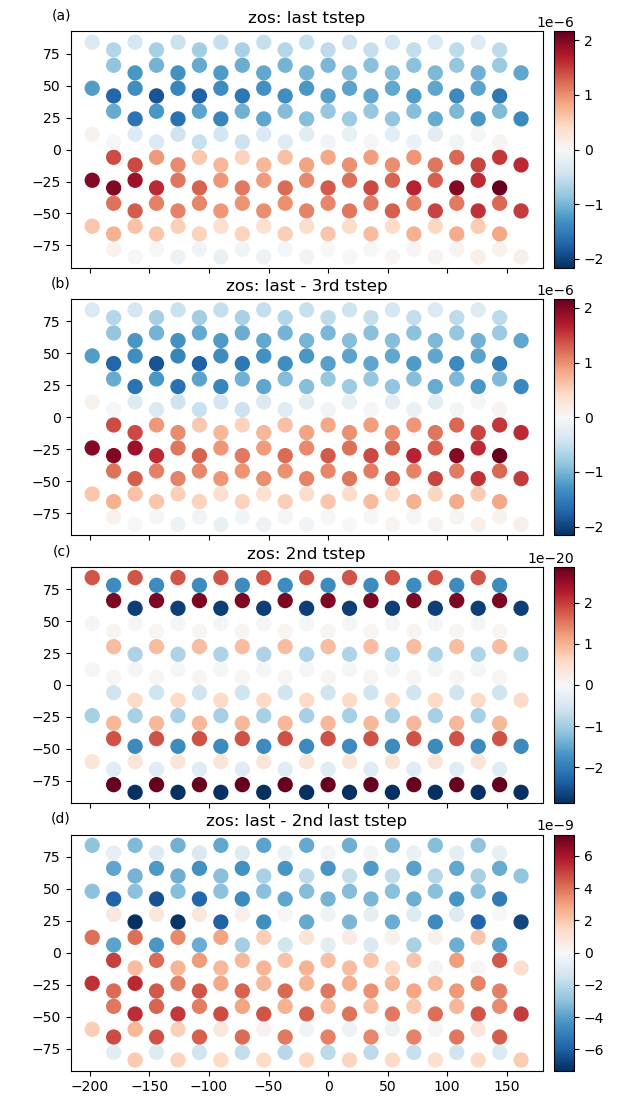

In [42]:
hca, hcb = pyic.arrange_axes(1,4, plot_cb=True, asp=0.5, fig_size_fac=1.5)
ii=-1

clim = 'sym'
# clim = 1e-3

# dsp = ds.isel(time=4)

var = 'zos'
ii+=1; ax=hca[ii]; cax=hcb[ii]
my_scatter(ds[var].isel(time=-1), ax=ax, cax=cax, clim=clim)
ax.set_title('zos: last tstep')

ii+=1; ax=hca[ii]; cax=hcb[ii]
my_scatter(ds[var].isel(time=-1)-ds[var].isel(time=2), ax=ax, cax=cax, clim=clim)
ax.set_title('zos: last - 3rd tstep')

ii+=1; ax=hca[ii]; cax=hcb[ii]
my_scatter(ds[var].isel(time=1), ax=ax, cax=cax, clim=clim)
ax.set_title('zos: 2nd tstep')

ii+=1; ax=hca[ii]; cax=hcb[ii]
my_scatter(ds[var].isel(time=-1)-ds[var].isel(time=-2), ax=ax, cax=cax, clim=clim)
ax.set_title('zos: last - 2nd last tstep')

for ax in hca:
    ax.quiver(ds.clon, ds.clat, dsp['atmos_fluxes_stress_xw'], dsp['atmos_fluxes_stress_yw'], color='r')

